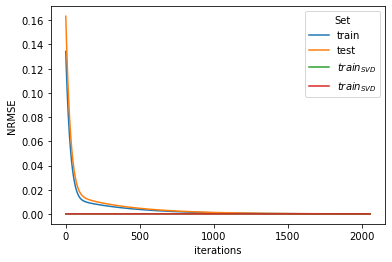

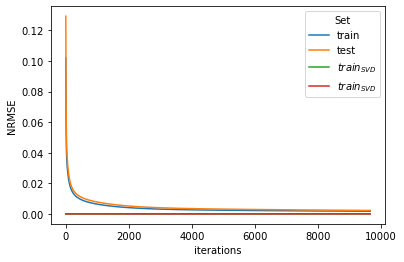

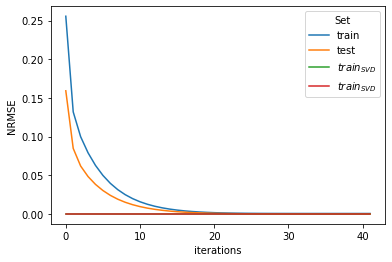

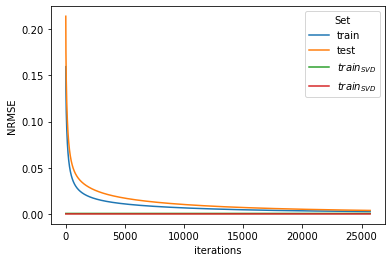

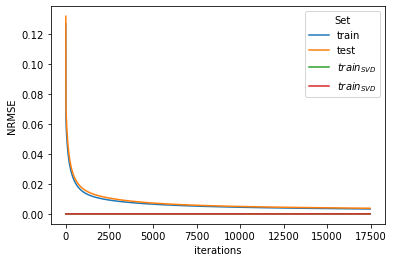

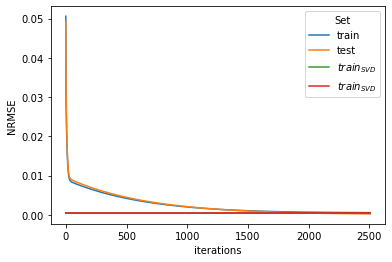

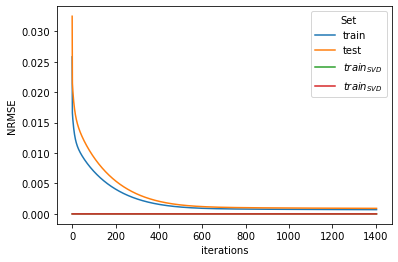

In [20]:
def read_data(stream, n):
    x = []
    y = []
    for _ in range(n):
        sample = list(map(float, stream.readline().split()))
        x.append(sample[:-1] + [1])
        y.append(sample[-1])
    return np.array(x), np.array(y)


def count_q(x, y, w):
    return np.sqrt(np.sum(((x @ w) - y) ** 2) / x.shape[0]) / (np.max(y) - np.min(y))


def process_sample(stop_ratio=None, max_iterations=None):
    if not stop_ratio and not max_iterations:
        raise ValueError("At least one stop factor should be specified")

    n_features = int(data.readline()) + 1
    n_samples = int(data.readline())
    train_x, train_y = read_data(data, n_samples)
    n_test = int(data.readline())
    test_x, test_y = read_data(data, n_test)

    h = 1 / np.sum(train_x ** 2)
    
    w = np.zeros(n_features, dtype=float)
    test_q, train_q = [], []
    lastQ = np.inf
    i = 0

    # w_SVD = np.linalg.inv(train_x.T @ train_x) @ train_x.T @ train_y
    w_SVD = np.linalg.pinv(train_x) @ train_y
    train_q_SVD = count_q(train_x, train_y, w_SVD)
    test_q_SVD = count_q(test_x, test_y, w_SVD)
    
    while True:
        w -= (train_x @ w - train_y) @ train_x * h

        newQ = count_q(train_x, train_y, w)
        train_q.append(newQ)
        test_q.append(count_q(test_x, test_y, w))
        i += 1
        if (max_iterations and i > max_iterations) or \
                (stop_ratio and np.abs(lastQ - newQ) < stop_ratio):
            break

        lastQ = newQ

    plt.plot(train_q, label='train')
    plt.plot(test_q, label='test')
    plt.plot([train_q_SVD] * len(train_q), label='$train_{{SVD}}$')
    plt.plot([test_q_SVD] * len(train_q), label='$train_{{SVD}}$')
    plt.xlabel('iterations')
    plt.ylabel('NRMSE')
    plt.legend(title='Set')
    plt.show()


N_FILES = 7


for i in range(N_FILES):
    with open("./data/{}.txt".format(i + 1)) as data:
        process_sample(stop_ratio=1e-7, max_iterations=1e5)
        